# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Introducción

**En este proyecto, trabajaremos con los datos de 500 clientes de la empresa de telecomunicaciones Megaline. Al revisar, corregir y analizar estos datos, buscamos entender los ingresos producidos por las dos tarifas de prepago que Megaline proporciona. Esta información será fundamental para que el departamento comercial realice ajustes en el presupuesto publicitario.**

**Nos centraremos en identificar quiénes son estos clientes, su origen, la tarifa que eligen y el número de llamadas realizadas y mensajes enviados durante 2018. El objetivo principal es analizar el comportamiento del cliente para determinar cuál de las tarifas de prepago es la más rentable.**

## Datos y Librerías

### Librerías

In [353]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import seaborn as sns
sns.set_style("whitegrid")

### Cargar los datos

In [354]:
try:
    df_calls = pd.read_csv('/datasets/megaline_calls.csv')
except:
    df_calls = pd.read_csv('C:/Users/Alejandro/Downloads/megaline_calls.csv')

try:    
    df_internet = pd.read_csv('/datasets/megaline_internet.csv')
except:    
    df_internet = pd.read_csv('C:/Users/Alejandro/Downloads/megaline_internet.csv')

try:
    df_messages = pd.read_csv('/datasets/megaline_messages.csv')
except:
    df_messages = pd.read_csv('C:/Users/Alejandro/Downloads/megaline_messages.csv')

try:
    df_plans = pd.read_csv('/datasets/megaline_plans.csv')
except:
    df_plans = pd.read_csv('C:/Users/Alejandro/Downloads/megaline_plans.csv')

try:
    df_users = pd.read_csv('/datasets/megaline_users.csv')
except:
    df_users = pd.read_csv('C:/Users/Alejandro/Downloads/megaline_users.csv')

## Datos

### Llamadas

In [355]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [356]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


**No contamos con valores vacíos apreciables.**

### Internet

In [357]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [358]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**No contamos con valores vacios, pero se debe corregir el formato de la columna "session_date".**

### Mensajes

In [359]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [360]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**No contamos con valores vacios, pero se debe corregir los valores de la columna "message_date".**

### Planes

In [361]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [362]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Contamos con información detallada de cada plan en este Dataframe. Lo utilizaremos al llevar a cabo el análisis y al comparar los gastos realizados por los clientes.**

### Usuarios

In [363]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [364]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**Este Dataframe nos muestra los detalles de cada usuario. Necesitamos corregir el formato de la columna reg_date y también de churn_date. Esta última columna contiene valores vacíos, pero esto no es un problema. Solo significa que el usuario sigue usando el servicio del plan contratado.**

# Limpieza y corrección de datos

In [365]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [366]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


## Formato de fechas

In [367]:
# Creamos una función que aplicaremos a cada fila de cada Dataframe
def to_date (date):
    return pd.to_datetime(date, format='%Y-%m-%d')

In [368]:
# Aplicamos la función a cada Dataframe

# Llamadas
df_calls['call_date'] = df_calls['call_date'].apply(to_date)

# Internet
df_internet['session_date'] = df_internet['session_date'].apply(to_date)

# Mensajes
df_messages['message_date'] = df_messages['message_date'].apply(to_date)

# Usuarios
df_users['reg_date'] = df_users['reg_date'].apply(to_date)
df_users['churn_date'] = df_users['churn_date'].apply(to_date)

In [369]:
# Comprobamos el DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta transformación.
</div>

## Errores en los datos

**Revisamos los datos y verificamos que no tengamos duplicados, valores errados o vacíos.**

In [370]:
df_calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

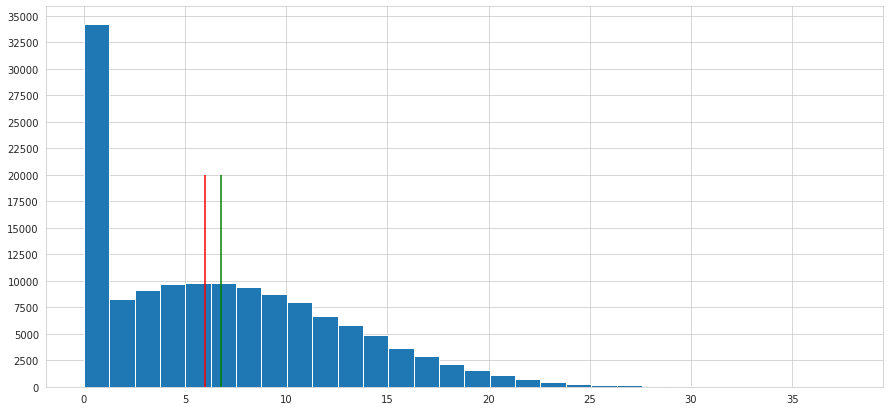

In [371]:
# Comportamiento de las llamadas según su duración
df_calls['duration'].hist(bins=30, figsize=(15,7))
# Mediana en rojo
plt.vlines(6,ymin=0, ymax=20000, color='red')
# Media en verde
plt.vlines(6.8,ymin=0, ymax=20000, color='green')
plt.yticks((np.arange(0, 35001, step=2500)))
plt.show()

In [372]:
df_calls.value_counts('duration')

duration
0.00     26834
8.37       102
4.02       102
3.91       101
4.30       100
         ...  
26.41        1
26.44        1
26.47        1
26.48        1
37.60        1
Length: 2802, dtype: int64

**Tenemos un gran número de llamadas que registran una duración de 0 segundos, representando casi el 20% del total. Estos registros están distorsionando significativamente nuestros resultados y las potenciales conclusiones. Dada su magnitud, no es viable simplemente descartarlos.**

**Antes de decidir cómo proceder, analicemos los datos excluyendo estas llamadas.**

In [373]:
df_calls[df_calls['duration']!=0]['duration'].describe()

count    110901.000000
mean          8.378196
std           5.354567
min           0.010000
25%           4.150000
50%           7.710000
75%          11.820000
max          37.600000
Name: duration, dtype: float64

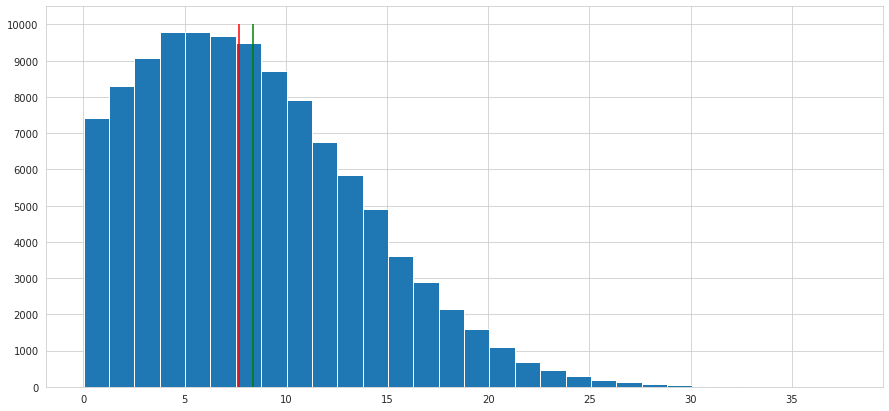

In [374]:
# Comportamiento de las llamadas duración nula
df_calls[df_calls['duration']!=0]['duration'].hist(bins=30, figsize=(15,7))
# Mediana en rojo
plt.vlines(7.7,ymin=0, ymax=10000, color='red')
# Media en verde
plt.vlines(8.4,ymin=0, ymax=10000, color='green')
plt.yticks(np.arange(0, 10001, step=1000))
plt.show()

<AxesSubplot:>

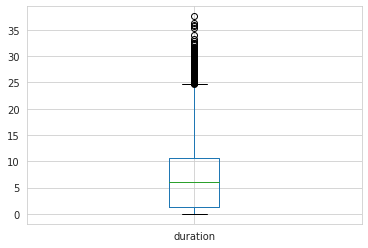

In [375]:
df_calls.boxplot('duration')

<AxesSubplot:>

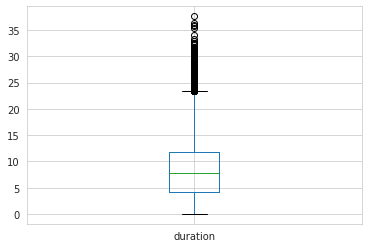

In [376]:
df_calls[df_calls['duration']!=0].boxplot('duration')

**Al excluir las llamadas de duración cero, se pueden apreciar variaciones en los valores promedio y posicionales, aunque no son extremadamente pronunciadas. A pesar de que estas llamadas representan cerca del 20% del total, su impacto real es menor, alrededor del 8%, cuando se integran con el total de datos. Dado que no representan ingresos y nuestro objetivo es evaluar la rentabilidad de los planes, debemos optar por trasladar estas entradas a un Dataframe separado, en vez de eliminarlas, para conservar la información por si la llegaramos a necesitar en el futuro.**

In [377]:
# Nuevo Dataframe con las llamadas perdidas
df_missed_calls = df_calls[df_calls['duration']==0]

# Limpiamos el Dataframe original de las llamadas perdidas
df_calls = df_calls[df_calls['duration']!=0]

## Extracción de información

**Antes de analizar, debemos determinar por cliente y user_id en nuestros Dataframes:**

**- Número de llamadas mensuales.**

**- Minutos mensuales.**

**- Mensajes mensuales.**

**- Datos usados al mes.**

**- Facturación mensual.**

**Es necesario considerar que, según Megaline, las llamadas se redondean al minuto, por lo que una llamada de 1 segundo se contabiliza como un minuto. Mientras que para el tráfico web, se redondea el total mensual al alza, es decir, 1025 megabytes se cobran como 2 gigabytes.**

### Minutos usados y cantidad de llamadas mensuales

In [378]:
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [509]:
# Creamos una columna con la duración cobrada y luego la agregaremos a df_calls
#duration_round = []
#for call in df_calls['duration']:
#    duration = math.ceil(call)
#    duration_round.append(duration)
#df_calls['duration_round'] = duration_round
#np.ceil(df_calls['duration'])

In [560]:
df_calls['duration_round'] = np.ceil(df_calls['duration'])
np.ceil(df_calls['duration'])

0          9.0
1         14.0
2         15.0
3          6.0
4          5.0
          ... 
137730     9.0
137731    11.0
137732     9.0
137733     1.0
137734    14.0
Name: duration, Length: 110901, dtype: float64

In [510]:
# Tabla nueva
df_calls.head()

,id,user_id,call_date,duration,duration_round,month,rounded_duration
0,1000_93,1000,2018-12-27,8.52,9,12,9.0
1,1000_145,1000,2018-12-27,13.66,14,12,14.0
2,1000_247,1000,2018-12-27,14.48,15,12,15.0
3,1000_309,1000,2018-12-28,5.76,6,12,6.0
4,1000_380,1000,2018-12-30,4.22,5,12,5.0


In [511]:
# Crearemos otra columna con el mes en el que se realizó la llamada
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls.head(5)

,id,user_id,call_date,duration,duration_round,month,rounded_duration
0,1000_93,1000,2018-12-27,8.52,9,12,9.0
1,1000_145,1000,2018-12-27,13.66,14,12,14.0
2,1000_247,1000,2018-12-27,14.48,15,12,15.0
3,1000_309,1000,2018-12-28,5.76,6,12,6.0
4,1000_380,1000,2018-12-30,4.22,5,12,5.0


In [512]:
# Agrupamos por usuario
df_calls_info = df_calls.pivot_table(index=['user_id', 'month'], values='duration_round', aggfunc=['sum', 'count'])
df_calls_info.describe()

,sum,count
,duration_round,duration_round
count,2256.000000,2256.000000
mean,436.324025,49.158245
std,231.711444,25.667968
min,2.000000,1.000000
25%,275.000000,32.000000
50%,429.000000,48.000000
75%,575.250000,64.000000
max,1510.000000,167.000000


In [513]:
df_calls_info.head()

sum          count
              duration_round duration_round
user_id month                              
1000    12               124             16
1001    8                182             22
        9                315             38
        10               393             47
        11               426             49

**La tabla muestra los minutos utilizados y las llamadas realizadas por usuario cada mes, datos esenciales para calcular la factura final de los clientes.**

### Cantidad de mensajes mensuales

**Calculemos el número de mensajes enviados por cada cliente.**

In [515]:
# Crearemos otra columna con el mes en el que se realizó el mensaje
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

In [516]:
df_messages_count = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
df_messages_count.describe()

,id
count,1806.000000
mean,42.110188
std,33.122931
min,1.000000
25%,17.000000
50%,34.000000
75%,59.000000
max,266.000000


In [517]:
df_messages_count.head()

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36

### Volumen de datos usados mensualmente

**Es importante recordar que también debemos redondear el uso de datos al giga más cercano. Este proceso es similar al realizado con las llamadas, aunque se hará en un orden distinto.**

In [518]:
# Creamos otra columna con el mes en el que se realizó la sesión
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [519]:
# Creamos la tabla con la cantidad de mensajes enviados por usuario mensualmente
df_internet_count = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

In [520]:
df_internet_count.describe()

,mb_used
count,2277.000000
mean,16882.197501
std,7869.784848
min,92.310000
25%,12347.720000
50%,16873.740000
75%,21041.520000
max,70931.590000


**Con la cifra mensual de datos en megabytes (mb), debemos redondearlos al giga más cercano. No olvidar que 1gb equivale a 1024mb.**

In [521]:
df_internet_count.head()

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30

In [522]:
# Creamos una función que nos convertirá los datos de mb a gb (se aproximan)

def gb_pay(mb_used):
    if pd.isnull(mb_used) == False:
        gb = mb_used/1024
        return math.ceil(mb_used/1024)
    else:
        return 0

In [523]:
# Aplicamos la función a cada columna
for column in df_internet_count:
    df_internet_count[column] = df_internet_count[column].apply(gb_pay)

In [524]:
# Tabla resultante
df_internet_count.head()

mb_used
user_id month         
1000    12           2
1001    8            7
        9           14
        10          22
        11          19

### Cuenta a pagar por cliente

**Con la información recolectada, procederemos a determinar el monto a pagar por cada cliente, teniendo en cuenta los costos de los planes, beneficios y gastos adicionales. Primero, en el DataFrame df_users, añadiremos dos columnas para señalar el mes de inicio y, en caso de ser necesario, el mes de finalización del plan con Megaline.**

In [525]:
# Juntamos todos los datos
df_pay = df_calls_info.merge(df_messages_count, how='outer', on=['user_id', 'month'])
df_pay = df_pay.merge(df_internet_count, how='outer', on=['user_id', 'month'])

/opt/conda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [526]:
df_pay.head(10)

(sum, duration_round)  (count, duration_round)    id  mb_used
user_id month                                                               
1000    12                     124.0                     16.0  11.0      2.0
1001    8                      182.0                     22.0  30.0      7.0
        9                      315.0                     38.0  44.0     14.0
        10                     393.0                     47.0  53.0     22.0
        11                     426.0                     49.0  36.0     19.0
        12                     412.0                     46.0  44.0     19.0
1002    10                      59.0                      8.0  15.0      7.0
        11                     386.0                     48.0  32.0     19.0
        12                     384.0                     38.0  41.0     15.0
1003    12                    1104.0                    118.0  50.0     27.0

In [527]:
# Cambiamos los nombres de las columnas para mitigar problemas y confusiones
df_pay.rename(columns={'id':'messages', 'mb_used':'gb_used',
                      ('sum', 'duration_round'):'call_duration',
                      ('count', 'duration_round'):'call_count'},inplace=True)
df_pay.columns

Index(['call_duration', 'call_count', 'messages', 'gb_used'], dtype='object')

**Con la información ya organizada, procedemos a determinar las cuentas mensuales. Primero, clasificaremos a los clientes en dos grupos según su plan.**

In [528]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [529]:
# Aquí tenemos todos los usuarios surf
surf_users = df_users[df_users['plan']=='surf']['user_id']

In [530]:
# Aquí tenemos todos los usuarios ultimate
ultimate_users = df_users[df_users['plan']=='ultimate']['user_id']

In [531]:
# Separamos a los usuarios con plan surf
df_pay_surf = df_pay.query("user_id in @surf_users")
df_pay_surf.head()

call_duration  call_count  messages  gb_used
user_id month                                              
1001    8              182.0        22.0      30.0      7.0
        9              315.0        38.0      44.0     14.0
        10             393.0        47.0      53.0     22.0
        11             426.0        49.0      36.0     19.0
        12             412.0        46.0      44.0     19.0

In [532]:
# Separamos a los usuarios con plan ultimate
df_pay_ultimate = df_pay.query("user_id in @ultimate_users")
df_pay_ultimate.head()

call_duration  call_count  messages  gb_used
user_id month                                              
1000    12             124.0        16.0      11.0      2.0
1006    11              10.0         2.0      15.0      3.0
        12              59.0         7.0     139.0     32.0
1008    10             476.0        54.0      21.0     17.0
        11             446.0        50.0      37.0     24.0

In [533]:
# Tabla de los planes para ver la información de cada uno
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [534]:
# Creamos la funcion con la que calcularemos los pagos mensuales de cada cliente surf
def surf_pay(month):
    pay=0
    if month['call_duration']>500:
        pay += (month['call_duration']-500)*0.03
    else:
        pay += 0
    
    if month['messages']>50:
        pay += (month['messages']-50)*0.03
    else:
        pay += 0
    
    if month['gb_used']>15:
        pay += (month['gb_used']-15)*10
    else:
        pay += 0
    
    return pay+20

In [535]:
# Aplicamos a los clientes con plan surf
df_pay_surf['pay'] = df_pay_surf.apply(surf_pay, axis=1)
df_pay_surf.head()

/tmp/ipykernel_28/2743355500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay_surf['pay'] = df_pay_surf.apply(surf_pay, axis=1)


call_duration  call_count  messages  gb_used    pay
user_id month                                                     
1001    8              182.0        22.0      30.0      7.0  20.00
        9              315.0        38.0      44.0     14.0  20.00
        10             393.0        47.0      53.0     22.0  90.09
        11             426.0        49.0      36.0     19.0  60.00
        12             412.0        46.0      44.0     19.0  60.00

In [536]:
def surf_pay(row):
    pay = 20  # Base pay
    
    # Calculate extra charge for calls
    extra_call_duration = row['call_duration'] - 500
    pay += max(0, extra_call_duration * 0.03)
    
    # Calculate extra charge for messages
    extra_messages = row['messages'] - 50
    pay += max(0, extra_messages * 0.03)
    
    # Calculate extra charge for GB used
    extra_gb_used = row['gb_used'] - 15
    pay += max(0, extra_gb_used * 10)
    
    return pay

df_pay_surf['pay'] = df_pay_surf.apply(surf_pay, axis=1)
df_pay_surf.head()

/tmp/ipykernel_28/3712643458.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pay_surf['pay'] = df_pay_surf.apply(surf_pay, axis=1)


call_duration  call_count  messages  gb_used    pay
user_id month                                                     
1001    8              182.0        22.0      30.0      7.0  20.00
        9              315.0        38.0      44.0     14.0  20.00
        10             393.0        47.0      53.0     22.0  90.09
        11             426.0        49.0      36.0     19.0  60.00
        12             412.0        46.0      44.0     19.0  60.00

In [537]:
# Creamos la funcion con la que calcularemos los pagos mensuales de cada cliente ultimate
def ultimate_pay(month):
    pay=0
    if month['call_duration']>3000:
        pay += (month['call_duration']-3000)*0.01
    else:
        pay += 0
    
    if month['messages']>1000:
        pay += (month['messages']-1000)*0.01
    else:
        pay += 0
    
    if month['gb_used']>30:
        pay += (month['gb_used']-30)*7
    else:
        pay += 0
    
    return pay+70

In [538]:
# Apliquemos a los clientes con plan ultimate
df_pay_ultimate.loc[:,'pay'] = df_pay_ultimate.apply(ultimate_pay, axis=1)
df_pay_ultimate.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


call_duration  call_count  messages  gb_used   pay
user_id month                                                    
1000    12             124.0        16.0      11.0      2.0  70.0
1006    11              10.0         2.0      15.0      3.0  70.0
        12              59.0         7.0     139.0     32.0  84.0
1008    10             476.0        54.0      21.0     17.0  70.0
        11             446.0        50.0      37.0     24.0  70.0

**Finalmente, contamos con las cuentas de todos los clientes, además de que están divididas por plan.**

# Análisis de la información

### Ingresos totales

In [539]:
print('Ingresos totales para el plan surf:', round(sum(df_pay_surf['pay']), 2), '$')
print('Ingresos totales para el plan ultimate:', sum(df_pay_ultimate['pay']), '$')

Ingresos totales para el plan surf: 95491.18 $
Ingresos totales para el plan ultimate: 52066.0 $


**El plan surf ha generado casi el doble de ingresos que el ultimate. Ahora, analicemos la distribución de clientes por plan.**

### Medias y medidas de posición

In [540]:
# Plan surf
df_pay_surf.describe()

,call_duration,call_count,messages,gb_used,pay
count,1544.000000,1544.000000,1222.000000,1558.000000,1573.000000
mean,436.802461,49.143135,40.109656,16.831194,60.706408
std,229.088544,25.304258,33.035500,7.711922,55.388042
min,2.000000,1.000000,1.000000,1.000000,20.000000
25%,279.000000,32.000000,16.000000,12.000000,20.000000
50%,430.000000,48.000000,32.000000,17.000000,40.360000
75%,579.000000,65.000000,54.000000,21.000000,80.360000
max,1510.000000,167.000000,266.000000,70.000000,590.370000


In [541]:
# Varianza surf
df_pay_surf['pay'].var()

3067.835152293878

In [542]:
# Valores repetidos surf
df_pay_surf.value_counts('pay', normalize=True)

pay
20.00     0.273999
50.00     0.031151
40.00     0.029879
80.00     0.029243
60.00     0.027972
            ...   
48.91     0.000636
49.06     0.000636
49.18     0.000636
49.26     0.000636
590.37    0.000636
Length: 663, dtype: float64

In [543]:
# Plan ultimate
df_pay_ultimate.describe()

,call_duration,call_count,messages,gb_used,pay
count,712.000000,712.000000,584.000000,719.000000,720.000000
mean,435.286517,49.191011,46.296233,17.331015,72.313889
std,237.459650,26.457567,32.942118,7.648185,11.395108
min,10.000000,2.000000,1.000000,1.000000,70.000000
25%,263.000000,30.000000,21.000000,13.000000,70.000000
50%,425.500000,48.000000,41.000000,17.000000,70.000000
75%,566.000000,64.000000,66.000000,21.000000,70.000000
max,1369.000000,156.000000,166.000000,46.000000,182.000000


In [544]:
# Varianza ultimate
df_pay_ultimate['pay'].var()

129.8484855509195

In [545]:
# Valores repetidos ultimate
df_pay_ultimate.value_counts('pay', normalize=True)

pay
70.0     0.943056
91.0     0.008333
126.0    0.008333
77.0     0.006944
112.0    0.006944
84.0     0.005556
105.0    0.005556
119.0    0.005556
182.0    0.002778
98.0     0.001389
133.0    0.001389
140.0    0.001389
154.0    0.001389
168.0    0.001389
dtype: float64

**El plan surf genera casi el doble de ingresos y tiene más del doble de clientes que el plan ultimate, alcanzando cuentas de hasta 600 dólares. Aunque ambos grupos de clientes tienen promedios similares en minutos, llamadas, mensajes y datos, es en el pago donde destacan las diferencias. El 94% de los clientes del plan ultimate pagan regularmente los 70 usd del costo del plan, mientras que los del plan surf varían más, con un promedio de 60 usd y una desviación de 55 usd. Solo el 27% de los clientes de surf se ajustan a su plan. Analizaremos estas diferencias más adelante con histogramas de pagos por plan.**

### Histogramas

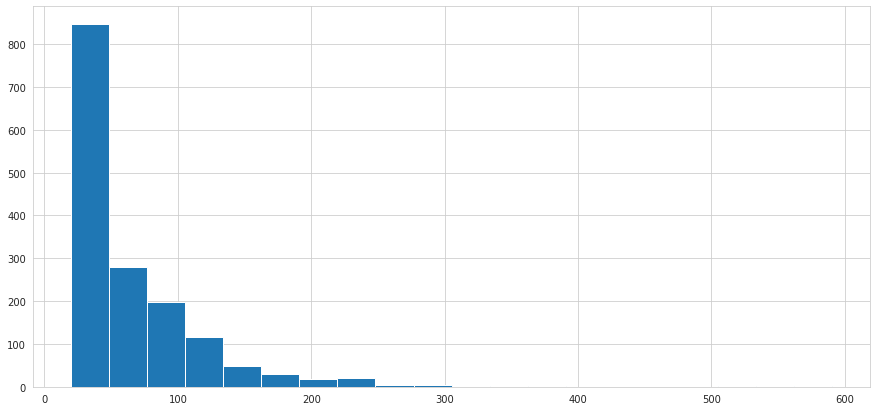

In [546]:
df_pay_surf['pay'].hist(bins=20, figsize=(15,7))
plt.show()

**Hay valores elevados que dificultan la visualización clara de los datos. Enfoquémonos en las cuentas de menos de 200 dólares.**

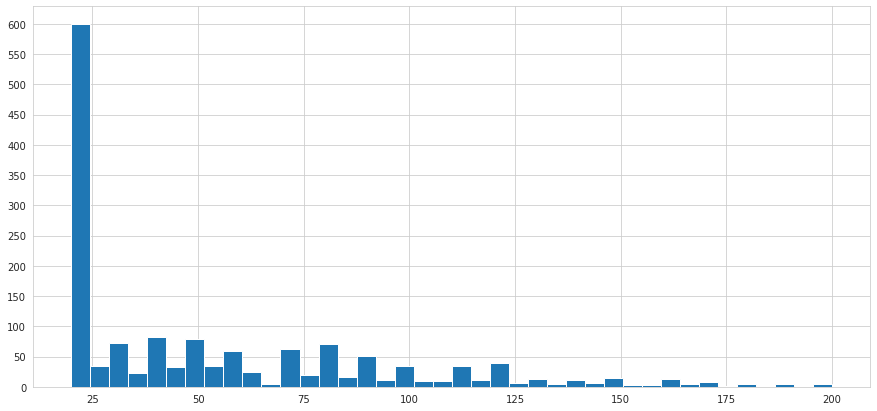

In [547]:
df_pay_surf[df_pay_surf['pay']<=200]['pay'].hist(bins=40, figsize=(15,7))
plt.yticks(range(0,601,50))
plt.show()

**Al alinear las divisiones con los costos de datos extras, notamos que la mayoría de incrementos en las cuentas provienen del uso adicional de datos. Analizaremos si esta tendencia se mantiene en el plan ultimate.**

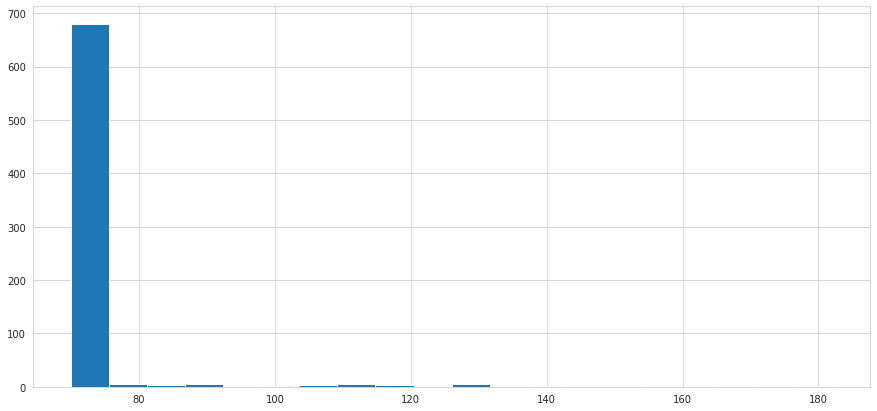

In [548]:
df_pay_ultimate['pay'].hist(bins=20, figsize=(15,7))
plt.show()

**Aunque el 94% de los datos está en 70 dólares, no nos beneficia restringir el rango. En vez de eso, nos centraremos en el detalle completo, prestando especial atención a las cifras en el eje y.**

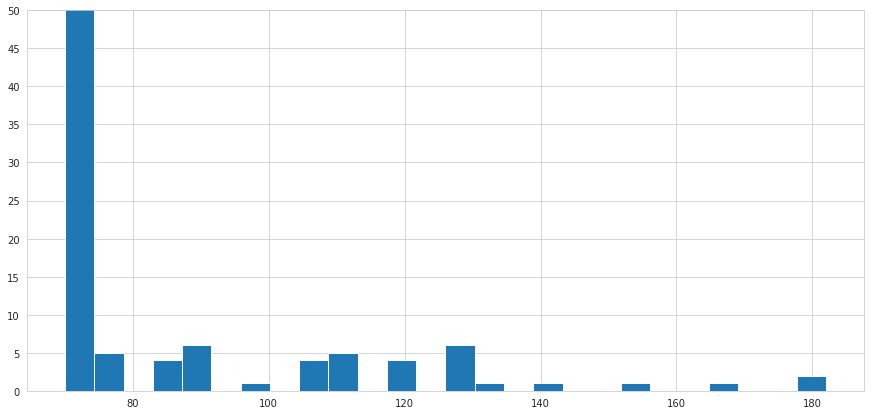

In [549]:
df_pay_ultimate['pay'].hist(bins=26, figsize=(15,7))
plt.ylim(0,50)
plt.yticks(np.arange(0,51,5))
plt.show()

**Se observan incrementos graduales debido únicamente a los datos extra utilizados. Aunque solo el 6% de las cuentas han incurrido en costos adicionales, si más clientes excedieran sus datos, podríamos ver una distribución similar a la del plan surf.**

In [550]:
df_calls['rounded_duration'] = np.ceil(df_calls['duration'])
df_internet_count = df_internet.groupby(['user_id', 'session_date']).sum().reset_index()

data_dict = {
    'call_duration': df_calls['rounded_duration'],
    'messages': df_messages['message_date'],  # Este será solo para histogramas
    'data_used': df_internet_count['mb_used'],
    'call_count': df_pay['call_count']
}

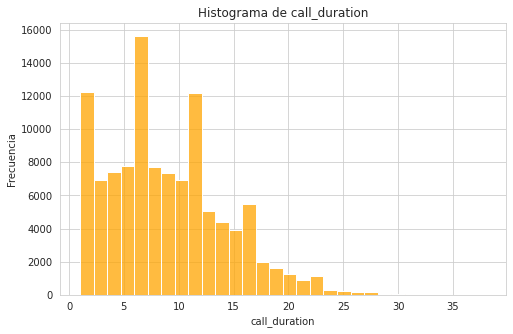

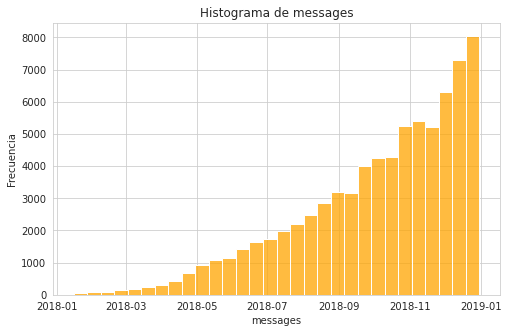

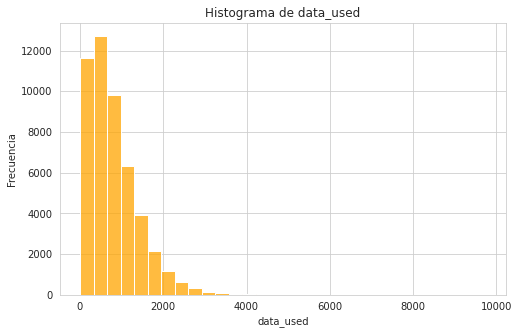

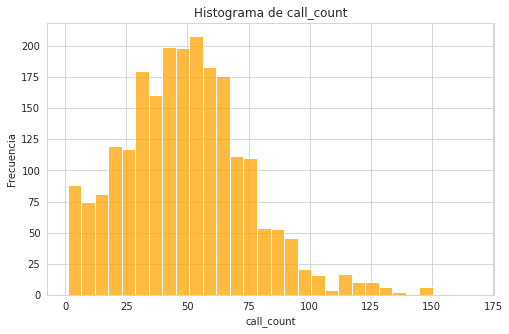

In [551]:
for item, data in data_dict.items():
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=False, bins=30, color='orange')
    plt.title(f'Histograma de {item}')
    plt.xlabel(item)
    plt.ylabel('Frecuencia')
    plt.show()

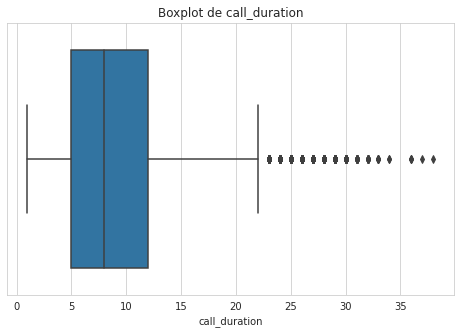

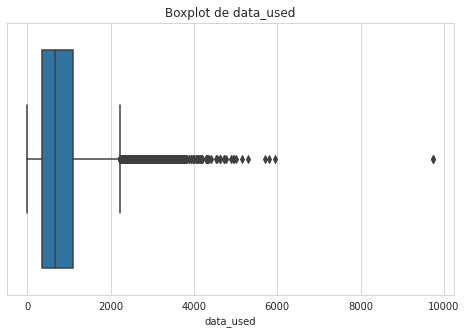

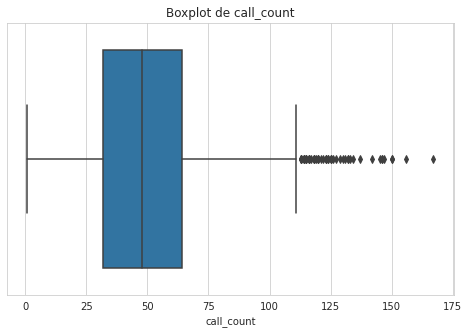

In [552]:
for item, data in data_dict.items():
    if data.dtype in [np.float64, np.int64]:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=data)
        plt.title(f'Boxplot de {item}')
        plt.xlabel(item)
        plt.show()

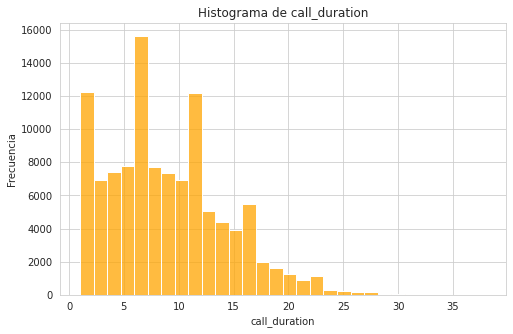

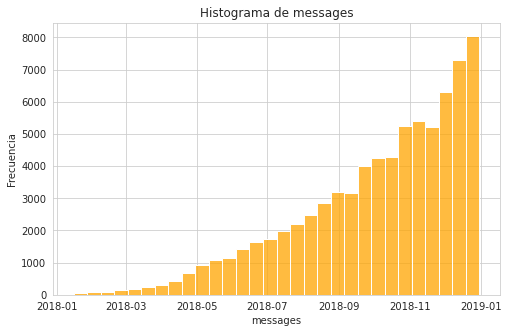

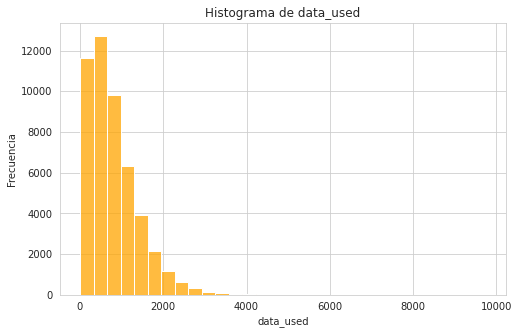

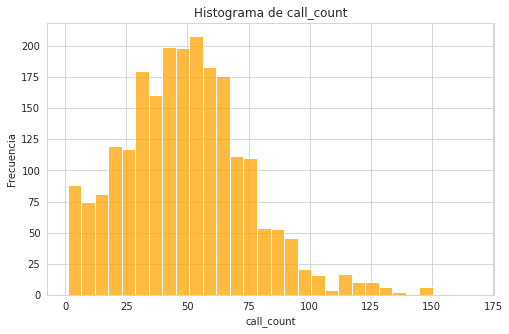

In [553]:
for item, data in data_dict.items():
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=False, bins=30, color='orange')
    plt.title(f'Histograma de {item}')
    plt.xlabel(item)
    plt.ylabel('Frecuencia')
    plt.show()

# Prueba de hipótesis

**Tras analizar la información de Megaline, es momento de evaluar las hipótesis propuestas. Se establece un margen de error del 5%. En la primera hipótesis, tratamos las muestras como individuales debido a sus distintos comportamientos por plan. En la segunda, las consideramos relacionadas ya que comparamos un grupo de clientes con el resto.**

In [554]:
# Establecemos margen de error
alpha = 0.05

### Hipótesis 1

**El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.**

In [555]:
# Fijamos las muestras
sample1 = df_pay_surf['pay']
sample2 = df_pay_ultimate['pay']

# Realizamos el test
results = st.ttest_ind(sample1, sample2)

# Vemos el resultado
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula, los ingresos promedio son diferentes.')
else:
    print('No rechazamos la hipótesis nula, los ingresos promedio son iguales.')

p-value: 2.862674510698644e-08
Rechazamos la hipótesis nula, los ingresos promedio son diferentes.


**Como se esperaba, hay una diferencia en los ingresos promedio entre los clientes de los planes Surf y Ultimate.**

### Hipótesis 2

**El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.**

**Antes de evaluar esta hipótesis, identificaremos a los usuarios de Nueva York-Nueva Jersey. Posteriormente, reagruparemos a los usuarios según su área y, finalmente, ejecutaremos el ttest_ind para validar la hipótesis.**

In [556]:
# Todos los usuarios del área de estados Nueva York-Nueva Jersey
ny_nj_users = df_users[df_users['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['user_id']

In [557]:
# Agrupamos a todos los usuarios
df_pay_full = df_pay_surf.append(df_pay_ultimate)

In [558]:
# Separamos a los clientes según su área
df_pay_ny_nj = df_pay_full.query("user_id in @ny_nj_users")
df_pay_not_ny_nj = df_pay_full.query("not (user_id in @ny_nj_users)")

**Ahora que contamos con las 2 muestras en las que aplicaremos nuestro testeo, podemos continuar.**

In [559]:
# Fijamos las muestras
sample1 = df_pay_ny_nj['pay']
sample2 = df_pay_not_ny_nj['pay']

# Realizamos el test
results = st.ttest_ind(sample1, sample2)

# Vemos el resultado
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula, los ingresos promedio son diferentes.')
else:
    print('No rechazamos la hipótesis nula, los ingresos promedio son iguales.')

p-value: 0.043557431621342436
Rechazamos la hipótesis nula, los ingresos promedio son diferentes.


# Conclusión general

**A lo largo de este proyecto, examinamos los datos de 500 clientes de Megaline, distribuidos en los planes Surf y Ultimate. El propósito era determinar qué plan es más rentable para guiar al departamento de publicidad en su próxima estrategia.**

**Iniciamos familiarizándonos con cinco conjuntos de datos, enfrentando desafíos como errores en el formato de fechas y la presencia de llamadas perdidas. Una vez limpiados los datos, analizamos los patrones de uso de los clientes: minutos hablados, mensajes enviados y datos consumidos.**

**Distinguiendo por tipo de plan, calculamos los gastos mensuales de cada cliente. A través de este análisis, observamos que:**

**- El plan Surf genera casi 2/3 de los ingresos totales, a pesar de su costo base de 20 usd.**

**- La mayoría de los clientes del plan Surf, a diferencia de los del Ultimate, suelen tener cargos extras por exceder sus límites, principalmente en datos. Solo el 27% de Surf se mantiene dentro de sus límites, frente al 94% de Ultimate.**

**- Los histogramas revelaron que gran parte de los cargos adicionales provienen del uso excesivo de datos.**

**- En promedio, un cliente Surf paga 60 usd mensuales, mientras que uno de Ultimate raramente supera su tarifa plana.**

**En conclusión, Megaline se beneficia principalmente de los clientes del plan Surf, quienes frecuentemente exceden sus límites, generando ingresos sustanciales para la empresa.**